# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb). It includes various informations regarding the movies such as popularity, user ratings, budget, and revenue among others. The aim is to analyze the different characterisitics and find out relations between them.

### Questions for Analysis
The primary objective of the analysis is for me to answer the following questions.

1. What characteristics do the most popular movies have in common? 
2. Are popularity and profit directly proportional?
3. Are there any factors influencing a movie to become less popular?
4. Are the budget and runtime correlated?



In [1]:
# In this section, all the packages deemed necessary for the data analysis process are imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In the data wrangling section, the objective is to gather, load, clean and structure the data in order to ease the data analysis process. 

### General Properties

In [2]:
# One of the initial steps is to load the dataset. It's done as follows;
movie_data_df = pd.read_csv('tmdb_movies_data.csv')

In [3]:
# we'll then check to see if the data has been loaded properly
movie_data_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
# We then proceed to check the rows and columns present in the dataset as follows;
movie_data_df.shape

(10866, 21)

The dataset has a total of 10866 rows and 21 columns.

In [5]:
# We then check the overview of the dataset by using the info() method.
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see from the above information that some values are missing. "imdbid" , "cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production_companies" columns have varying numbers of missing values. I'll later deal with them in the cleaning phase.

In [6]:
#let's check the datatypes of the fields
movie_data_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

release_date seems to be stored in string format. we'll have to change it to the correct format during the cleaning process.

In [7]:
# the following code is used to identify no of null values in each column.
movie_data_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# To find out the number of duplicates in our data, we do it as follows;
movie_data_df.duplicated().sum()

1

In [9]:
# We can also view statistical information about the data using the describe() method
movie_data_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Using describe, we're able to have an insight into our data.

We can see that the minimum values for runtime is zero. Including it in the analysis would be of no use. We'll check the number of rows in the next cells and decide if dropping it would affect us or not.

Also, 50% of the movies have a budget and revenue of 0 which raises questions. The same is the case for budget and revenue where 50% of the data has 0 budget and revenue. It doesn't make sense for budget to be 0. It may be due to error while collecting and inserting the data.

In [10]:
df_zero_runtime = movie_data_df.query('runtime == 0')
len(df_zero_runtime)

31

31 movie entries have a runtime of 0. Including them in our analysis would be pointless so can opt to drop them later on if required.

#### End of Data wrangling
Overall, there seem to be some missing values and inconsistencies. release_date has been represented incorrectly. Only a single duplicate was found.


## Data Cleaning
In the cleaning phase, we'll perform the task of fixing errors, correct the formatting, deal with duplicates and fill missing values. Overall, it's in this section that we deal with the messy nature of the data resulting in a clean and structured data.

In [11]:
movie_data_df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [12]:
# We'll drop the columns that I consider to be insignificant for our analysis.
movie_data_df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'cast'], axis=1, inplace= True)


In [13]:
movie_data_df.shape

(10866, 14)

In [14]:
#confirm the above step has worked
movie_data_df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [15]:
# use info to once again check our dataframe.
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In the first step of our cleaning, we have removed columns that aren't necessary to analyze the data. In doing so, the number of columns have reduced from 21 to 14 while the number of rows is still the same. We still have some missing values so we'll deal with them in the next cells. We can also notice that release_date is represented as string. We'll change it to datetime data type.

In [16]:
# replacing missing values.
movie_data_df.fillna("N/A", inplace = True)

In [17]:
# cross check to make sure the null values have been replaced
movie_data_df.isnull().sum().any()

False

Next, we'll remove the single duplicate we found earlier.

In [18]:
#removing the duplicate
movie_data_df.drop_duplicates(inplace = True)

In [19]:
movie_data_df.shape

(10865, 14)

We've confirmed that the duplicate has been dropped since the number of rows has decreased from 10866 to 10865.

In [20]:
#change the data type of release_date column to the correct one.
movie_data_df.release_date = pd.to_datetime(movie_data_df['release_date'])

In [21]:
movie_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   director              10865 non-null  object        
 5   runtime               10865 non-null  int64         
 6   genres                10865 non-null  object        
 7   production_companies  10865 non-null  object        
 8   release_date          10865 non-null  datetime64[ns]
 9   vote_count            10865 non-null  int64         
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
 12  budget_adj            10865 non-null  float64       
 13  revenue_adj     

From the info above, we can infer that we have dealt with all the missing values resulting in a uniform data.

We can say now that our data is pretty clean. The column names all follow a similar convention, all are in lowercase. Irrelevant columns have been dropped and null values have been dealt with. The single duplicate value has also been removed. Finally, I also made sure that all the fields are represented using the correct data types.

So now, we can proceed to the Exploratory section.

<a id='eda'></a>
## Exploratory Data Analysis

In the EDA section, data investigation is performed to uncover insights. It will aide in having a much better understanding of the data. 

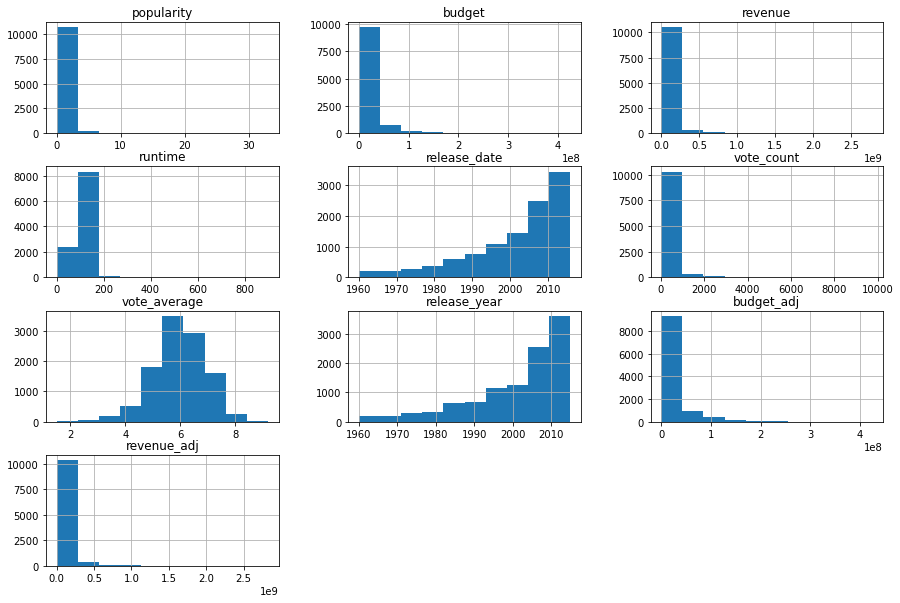

In [22]:
#Let's plot the histograms for all the columns to visualize the data and analyze the skewness.
movie_data_df.hist(figsize=(15,10));

The columns release_date and release_year seem to be heavily skewed to the left. This signifies that the majority of the movies included in the dataset have been made in the 2000s.

In [23]:
movie_data_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Multiple movies have a budget, revenue and runtime of 0.

In [24]:
movie_filtered = movie_data_df.query('budget > 0 or revenue > 0 or runtime > 0')

In [25]:
print("no of movies to analyze: ", len(movie_filtered))
print("The shape of the filtered data:", movie_filtered.shape)

no of movies to analyze:  10837
The shape of the filtered data: (10837, 14)


In [26]:
movie_filtered.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09


One thing I've noticed is that it would be convenient for the analysis later on if I could add a profit column where I can depict the profits made be subtracting the budget from the revenue.

In [27]:
movie_filtered['profit'] = movie_filtered['revenue'] - movie_filtered['budget']

C:\Users\keenj\AppData\Local\Temp\ipykernel_3660\580166140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_filtered['profit'] = movie_filtered['revenue'] - movie_filtered['budget']


In [28]:
# check the correlation between multiple characteristics
movie_filtered.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.545302,0.663334,0.137044,0.800881,0.209406,0.090761,0.513332,0.609018,0.629009
budget,0.545302,1.000000,0.734834,0.189994,0.632579,0.080688,0.116963,0.968946,0.622379,0.570118
revenue,0.663334,0.734834,1.000000,0.162226,0.791112,0.172402,0.057794,0.706341,0.919084,0.976165
runtime,0.137044,0.189994,0.162226,1.000000,0.162660,0.155753,-0.112484,0.219928,0.175121,0.135709
vote_count,0.800881,0.632579,0.791112,0.162660,1.000000,0.253769,0.108737,0.586897,0.707850,0.755859
vote_average,0.209406,0.080688,0.172402,0.155753,0.253769,1.000000,-0.116750,0.092681,0.192936,0.183012
release_year,0.090761,0.116963,0.057794,-0.112484,0.108737,-0.116750,1.000000,0.017791,-0.065611,0.032579
budget_adj,0.513332,0.968946,0.706341,0.219928,0.586897,0.092681,0.017791,1.000000,0.646481,0.545541
revenue_adj,0.609018,0.622379,0.919084,0.175121,0.707850,0.192936,-0.065611,0.646481,1.000000,0.914135
profit,0.629009,0.570118,0.976165,0.135709,0.755859,0.183012,0.032579,0.545541,0.914135,1.000000


In [32]:
# randomly select 1000 movies to analyze the runtime of the movies
movies_1000 = movie_filtered.sample(n = 1000)

C:\Users\keenj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


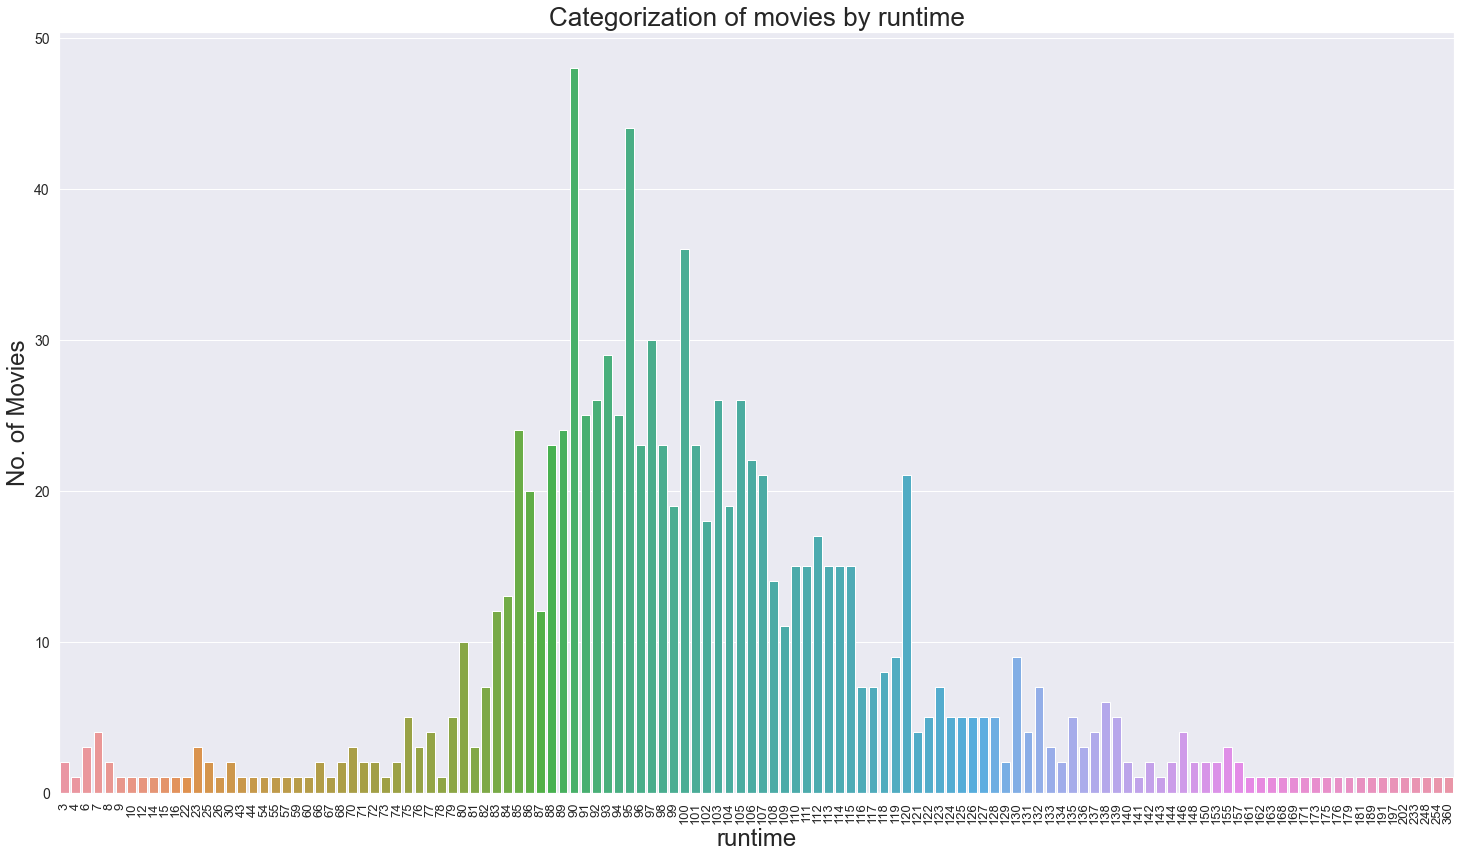

In [33]:
# Plot the distribution of the randomly selected movies by runtime. It will help us in identifying number of movies having a particular runtime.
# I referred this link; https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/ to manipulate the size of the plot.
sns.countplot(movies_1000["runtime"])
plt.title('Categorization of movies by runtime', fontsize=26)
plt.ylabel('No. of Movies', fontsize=24)
plt.xlabel('runtime', fontsize=24)
plt.xticks(rotation='vertical', fontsize=13)
plt.yticks(fontsize=14)
sns.set(rc = {'figure.figsize':(25,14)})
# sns.set(font_scale = 2)
plt.show()

The above plot helps us to identify the number of movies having a particular runtime.

In [35]:
#function to plot bar chart
def bar_plot(x_parameter, y_parameter, data, xlabel, ylabel, title):
    data.plot.bar(x = x_parameter, y= y_parameter, rot=0, figsize = (12, 6))
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize = 22)
    

### 1. What characteristics do the most popular movies have in common?

In [36]:
# I'll use the sort_values method to extract the top 20 popular movies and analyze them.
df_sorted_by_popularity = movie_filtered.sort_values(by='popularity', ascending=False)
top_20_popular_movies = df_sorted_by_popularity.head(20)

In [37]:
top_20_popular_movies

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,456752480
630,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,603312399
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
631,12.971027,170000000,714766572,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014,1.565855e+08,6.583651e+08,544766572
1329,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,764398007
632,11.422751,20000000,78739897,John Wick,Chad Stahelski|David Leitch,101,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07,58739897
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
633,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,123,Science Fiction|Adventure|Thriller,Lionsgate|Color Force,2014-11-18,3590,6.6,2014,1.151364e+08,6.927528e+08,627100229


In [38]:
top_20_popular_movies.budget.mean()

145200000.0

We can deduce that the genres "Action", "Adventure" , "Science Fiction" & "Thriller" are the genres asscoiated with the highest grossing or popular movies. Also the movies have a pretty high budget with the mean of the top 20 popular movies being 145,200,000 million. So, higher budget may result in the movie being popular. Another feature they have in common is that most of the top 20 popular movies were made after the year 2014. This may signify that the technological advancements have given these movies the edge over older movies.

In [40]:
# Let's visualize the comparisons between the top 5 popular movies
top_5 = df_sorted_by_popularity.head(5)

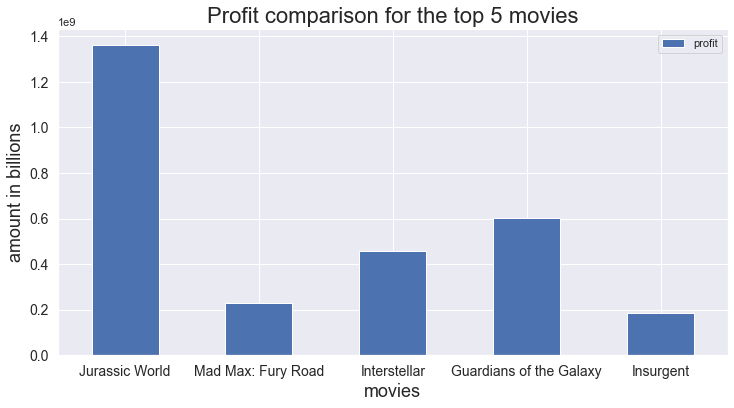

In [41]:
# bar chart to compare the profit of the top 5 popular movies
bar_plot('original_title', 'profit', top_5, 'movies', 'amount in billions', 'Profit comparison for the top 5 movies')

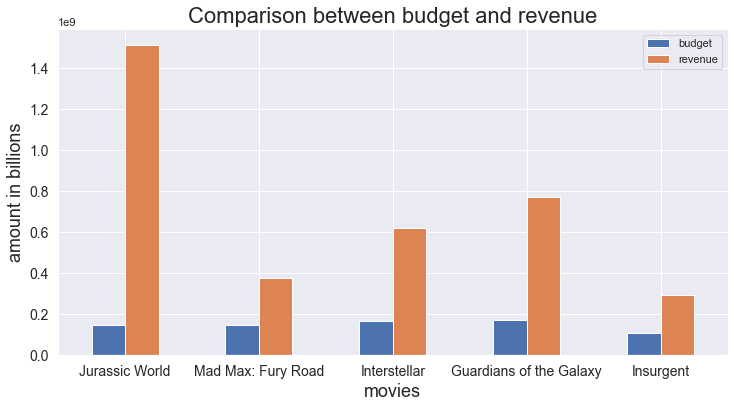

In [42]:
# bar chart to compare the budget and revenue for the top 5 popular movies
bar_plot('original_title', ['budget','revenue'], top_5, 'movies', 'amount in billions', 'Comparison between budget and revenue')

### 2. Are popularity and profit directly proportional?

In [43]:
movie_filtered['profit'].corr(movie_filtered['popularity'])

0.629008773040609

A correlation of 0.59 signifies a decent positive correlation between the two which means that when popularity increases, the profit also increases making them directly proportional. I'll plot the correlation using scatterplot below.

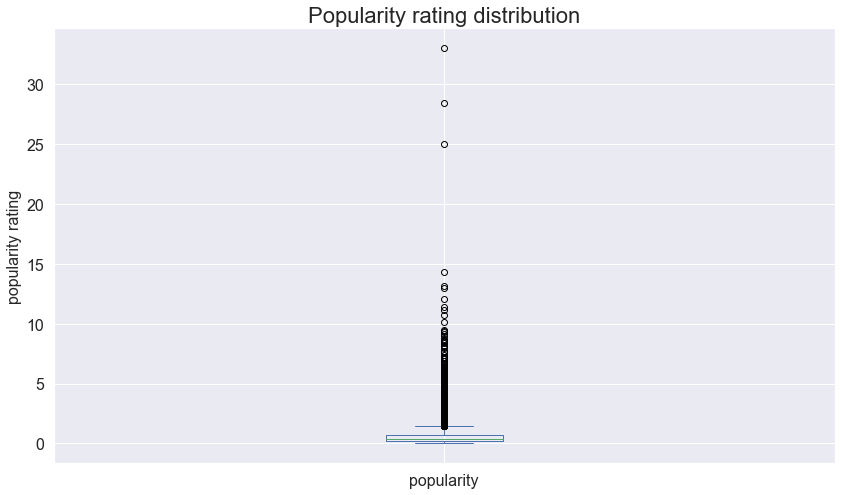

In [44]:
# first let's plot a boxplot to identify any outliers in the popularity field.
movie_filtered.popularity.plot(kind='box', figsize=(14,8), fontsize = 16);
plt.title('Popularity rating distribution', fontsize=22)
plt.ylabel('popularity rating', fontsize=16)

plt.show()

values greater than 15 for popularity are outliers since majority of the values are concentrated betweeen 0 and 14.

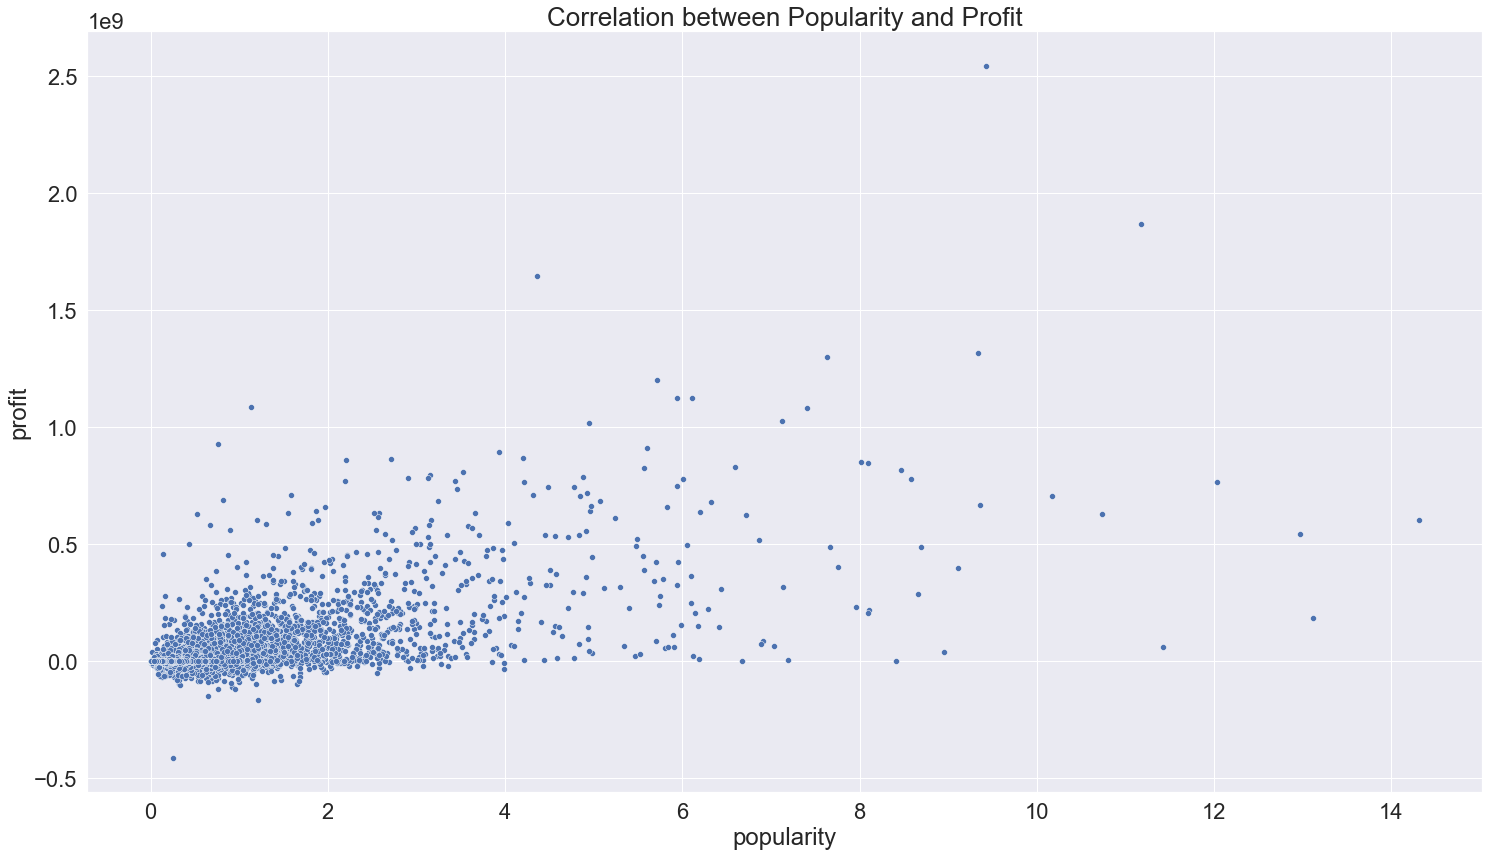

In [46]:
sns.scatterplot(x = 'popularity', y = 'profit', data = movie_filtered.query('popularity <= 15'));
sns.set(font_scale = 2)

plt.title('Correlation between Popularity and Profit', fontsize = 26)

plt.show()

The scatterplot solidifies our finding earlier that the two properties are indeed correlated.

### 3. Are there any factors influencing a movie to become less popular?

In [47]:
df_sorted_by_popularity.tail(20)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
8053,0.002120,0,0,Acqua e sapone,Carlo Verdone,109,Drama|Family,N/A,1983-10-27,21,6.1,1983,0.0000,0.000000e+00,0
3910,0.002006,0,0,Steve Jobs: One Last Thing,N/A,60,Documentary,N/A,2011-11-02,11,6.6,2011,0.0000,0.000000e+00,0
6553,0.001983,0,0,Paheli,Amol Palekar,141,Drama|Thriller|Science Fiction|Romance|Foreign,Red Chillies Entertainment,2005-06-24,13,6.2,2005,0.0000,0.000000e+00,0
4947,0.001783,0,273747,The Central Park Five,Sarah Burns|Ken Burns,119,Documentary,Florentine Films|WETA,2012-05-24,22,6.4,2012,0.0000,2.599896e+05,273747
3369,0.001682,0,0,Wizards On Deck With Hannah Montana,N/A,68,Family,N/A,2008-02-11,14,6.1,2008,0.0000,0.000000e+00,0
9593,0.001662,0,0,Peter Pan,N/A,52,Action|Adventure|Animation|Family|Fantasy,Burbank Films Australia,1988-01-01,28,6.6,1988,0.0000,0.000000e+00,0
4919,0.001635,0,0,Freddie Mercury: The Great Pretender,Rhys Thomas,107,Music|Documentary,Arte|Eagle Rock Entertainment,2012-09-25,10,7.2,2012,0.0000,0.000000e+00,0
10592,0.001567,0,0,Yuppies 2,Enrico Oldoini,104,Comedy,N/A,1986-01-01,11,5.0,1986,0.0000,0.000000e+00,0
7267,0.001531,0,0,Long Way Round,Russ Malkin|David Alexanian,294,Documentary|Adventure,N/A,2004-10-03,11,7.0,2004,0.0000,0.000000e+00,0
1918,0.001423,0,0,Circle of Eight,Stephen Cragg,84,Mystery|Horror,Bronson Avenue|Paramount Pictures Digital Ente...,2009-10-27,11,4.3,2009,0.0000,0.000000e+00,0


We cannot determine from the information above regarding the factors affecting the popularity of the movies negatively.

### 4. Are the budget and runtime correlated?

In [48]:
movie_filtered['budget'].corr(movie_filtered['runtime'])

0.18999359336240493

We can clearly see that the budget doesn't influence the runtime.

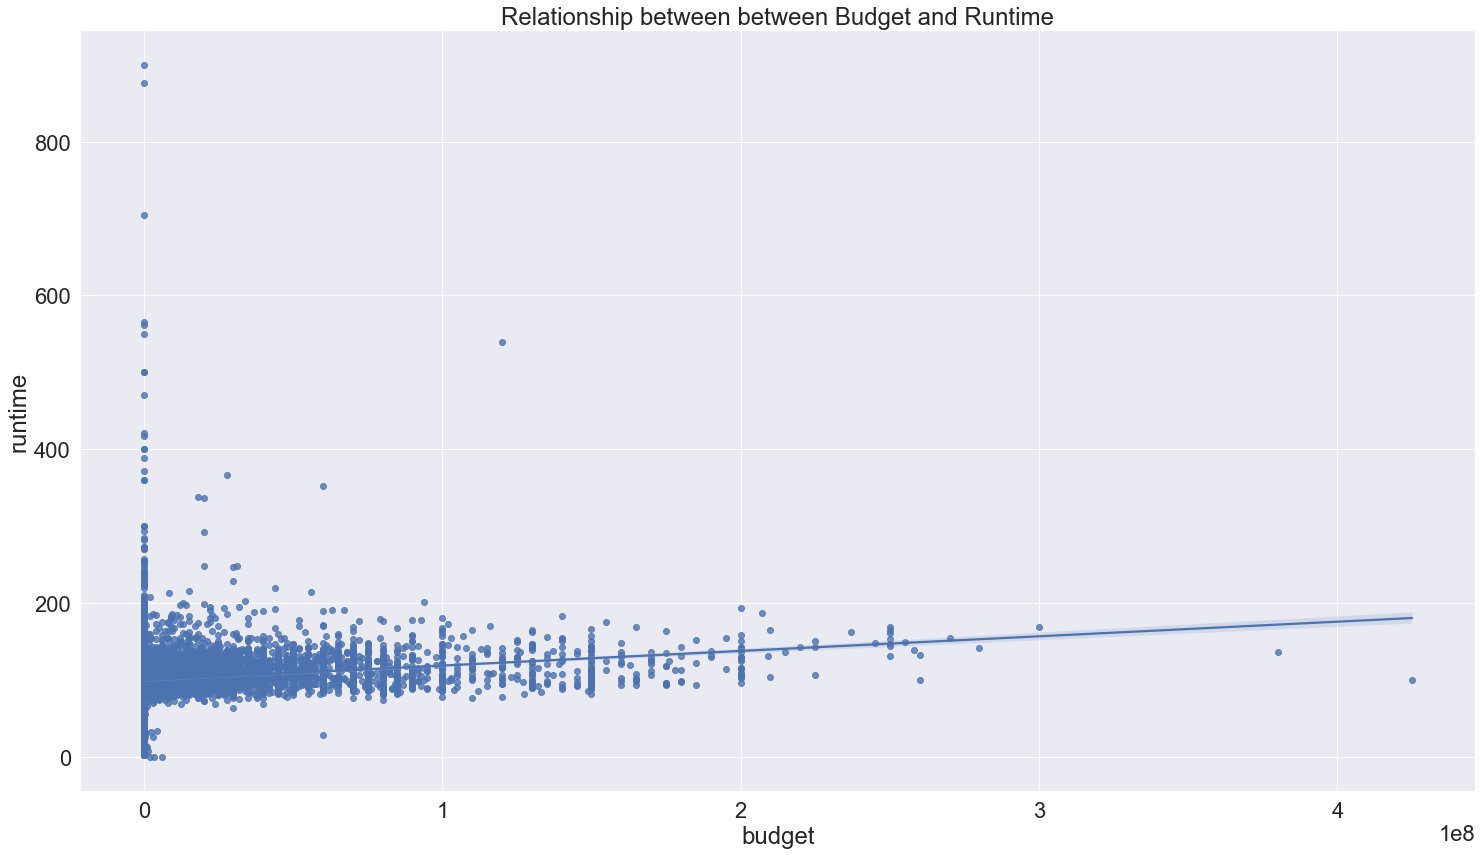

In [49]:
# I tried to switch things up and visualize using regplot instead of scatterplot.
# https://seaborn.pydata.org/generated/seaborn.regplot.html, this is the resource I used to implement the regplot
sns.regplot(x="budget", y="runtime", data=movie_filtered)
sns.set(font_scale = 2)

plt.title('Relationship between between Budget and Runtime')

plt.show()

This also confirms that there isn't any substantial correlation between budget and runtime.

<a id='conclusions'></a>
## Conclusions

This concludes the data analysis task. The objective was to investigate a dataset containing list of movies. Various characteristics of the movies such as budget, revenue, genre, and runtime among others were included.

Regarding the cleanliness of the data, there was some fair amount of missing data and there were input errors in the fields budget, revenue and runtime. Apart from those, there wasn't any major issue with the data.

What I've been able to deduce from the analysis is that there is a similarity in the genre of the majority of the top grossing/ popular movies. The genres "Adventure" , "Action", "Science Fiction" and "Thriller" were recurring themes through out the list of genres in the popular movies. Another observation is that most of the popular movies had been allocated a sizeable amount of budget. I've found that the mean budget allocation of the top 20 popular movies to be 145,200,000 million. Also, production companies such as "Universal studios", "Marvel Studios" and "Paramount Pictures" are associated with most of the popular movies. 

Another observation concerning the popular movies is that out of the 20 most popular movies, 15 of them were made after the year 2014. This could imply that advancements in the film industry may have played a huge role in the movies becoming widely popular.

I've also been able to identfy the relationship between profit and popularity where the values are directly proportional. Whenever the value of one increases the other does as well and vice versa.

About a movie becoming unpopular, I wasn't able to identify factors influencing the popularity negatively with the data at hand. Further information or extensive data maybe required to identify relationships resulting in low popularity.

Finally, the last question I tried to answer was the relationship between budget and runtime. According to my findings, budget doesn't influence the runtime of the movies. Low budget doesn't necessarily result in a movie's runtime becoming becoming short or higher budget doesn't mean the runtime of the movie will be longer.

## Limitations 

<ul>
    <li>Majority of the values for "runtime" , "budget" and "revenue" are zero. This forced me into filtering the ones above zero for my analysis resulting in a smaller subset of data which could cause a hindrance in the quality of the data analysis process. </li>
<br>

<li>Another issue I've found is that the unit of currency for budget and revenue hasn't been provided. </li>

<br>
    
<li>Information regarding the popularity scale could help. The current representation is quite vague and may cause confusion.</li>